# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

  Obtaining dependency information for iso3166 from https://files.pythonhosted.org/packages/08/d0/bf18725b8d47f37858ff801f8e4d40c6982730a899725bdb6ded62199954/iso3166-2.1.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/e5/ae/580600f441f6fc05218bd6c9d5794f4aef072a7d9093b291f1c50a9db8bc/plotly-5.24.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 31.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.9.0
    Uninstalling plotly-5.9.0:
      Successfully uninstalled plotly-5.9.0
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [253]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [254]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [255]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* Check for shape of date, Null and duplicated data. 

In [256]:
df_data.shape

(4324, 9)

In [257]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [258]:
df_data.isna().value_counts()

Unnamed: 0.1  Unnamed: 0  Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False         False       False         False     False  False   False          True   False             3360
                                                                                False  False              964
Name: count, dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

* Removing columns containing junk data. 

In [259]:
df_data.duplicated().value_counts()

False    4324
Name: count, dtype: int64

In [260]:
df_data['Unnamed: 0.1'].describe()

count   4,324.00
mean    2,161.50
std     1,248.38
min         0.00
25%     1,080.75
50%     2,161.50
75%     3,242.25
max     4,323.00
Name: Unnamed: 0.1, dtype: float64

In [261]:
df_data['Unnamed: 0'].describe()

count   4,324.00
mean    2,161.50
std     1,248.38
min         0.00
25%     1,080.75
50%     2,161.50
75%     3,242.25
max     4,323.00
Name: Unnamed: 0, dtype: float64

In [262]:
df_data = df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

## Descriptive Statistics

In [263]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

RVSN USSR had the most launches in history.

In [264]:
launch_by_org = df_data.groupby('Organisation', as_index = False).Detail.count()

In [265]:
launch_by_org.rename(columns = {'Detail': 'Num_launches'}, inplace = True)

In [266]:
h_bar = px.bar(y = launch_by_org.Organisation,
               x = launch_by_org.Num_launches,
               orientation='h',
               color = launch_by_org.Num_launches,
              title='Mission Launches by Organization')

h_bar.update_layout(xaxis_title='Num of Launches', yaxis_title='Organisation', coloraxis_showscale=False )
h_bar.update_yaxes(categoryorder='total ascending', tickfont=dict(size=5))
# h_bar.update_xaxes(tickfont=dict(size=15))

h_bar.show()

# Number of Active versus Retired Rockets

82% of previous launches have been retired. 

In [270]:
status_distribution = df_data.groupby('Rocket_Status', as_index = False).agg(counts = ('Detail', 'count'))

In [271]:
fig = px.pie(status_distribution, values='counts', names='Rocket_Status', title='Distribution of Rocket Status')
fig.show()

# Distribution of Mission Status

90% of all launches were successful. 

In [272]:
mission_sta_distribution = df_data.groupby('Mission_Status', as_index = False).agg(counts = ('Detail', 'count'))

In [273]:
fig = px.pie(mission_sta_distribution, values='counts', names='Mission_Status', title='Distribution of Mission Status')
fig.show()

# How Expensive are the Launches? 

Majority of the launches were less than 250MM dollars per launch. USSR had 2 missions in 1987 and 1988 and each of them costs 5000MM dollars. It could be incorrect data records. 

In [274]:
df_data.Price = df_data.Price.str.replace(',','').astype(float)
df_data_dropna = df_data.dropna()
df_data_dropna.isna().value_counts()

Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False         False     False  False   False          False  False             964
Name: count, dtype: int64

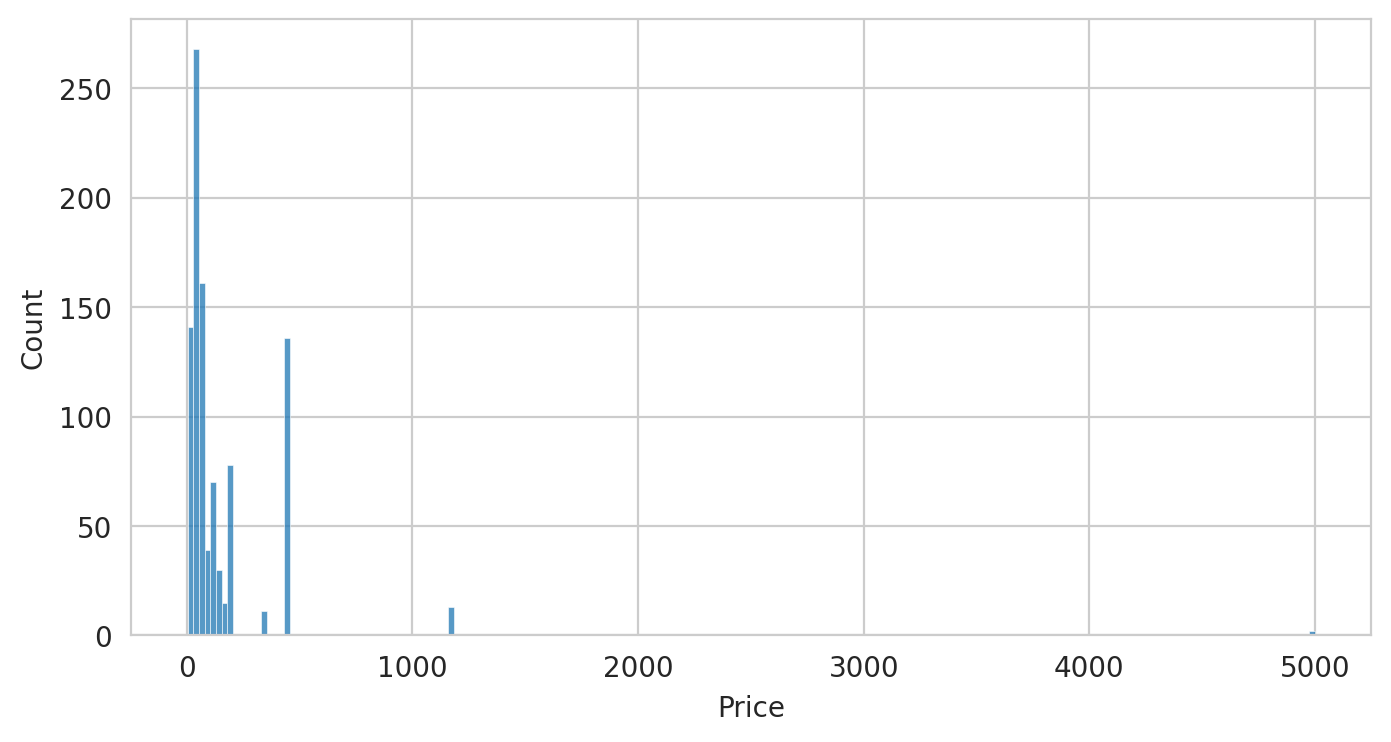

In [275]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.histplot(data=df_data_dropna,
                x='Price'
                )
 
plt.show()

In [276]:
df_data[df_data.Price==df_data.Price.max()]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan","Tue Nov 15, 1988 03:00 UTC",Energiya/Buran | Buran,StatusRetired,"5,000.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan","Fri May 15, 1987 17:30 UTC",Energiya/Polyus | Polyus Space Station,StatusRetired,"5,000.00",Success


# Use a Choropleth Map to Show the Number of Launches by Country

Russia and USA are the top 2 countries with most launches.

In [277]:
df_data['Country'] = df_data.Location.str.split(pat = ',').str[-1]
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA


In [278]:
df_data['Country'] = df_data['Country'].str.strip()
df_data['Country_trans'] = df_data['Country']
df_data.loc[df_data.Country == 'Russia', 'Country_trans'] = 'Russian Federation'
df_data.loc[df_data.Country == 'New Mexico','Country_trans'] = 'USA'
df_data.loc[df_data.Country == 'Yellow Sea', 'Country_trans'] = 'China'
df_data.loc[df_data.Country == 'Shahrud Missile Test Site', 'Country_trans'] = 'Iran, Islamic Republic of'
df_data.loc[df_data.Country == 'Iran', 'Country_trans'] = 'Iran, Islamic Republic of'
df_data.loc[df_data.Country == 'Pacific Missile Range Facility', 'Country_trans'] = 'USA'
df_data.loc[df_data.Country == 'Barents Sea', 'Country_trans'] = 'Russian Federation'
df_data.loc[df_data.Country == 'Gran Canaria','Country_trans'] = 'USA'
df_data.loc[df_data.Country == 'North Korea','Country_trans'] = "Korea, Democratic People's Republic of"
df_data.loc[df_data.Country == 'Pacific Ocean','Country_trans'] = "USA"
df_data.loc[df_data.Country == 'South Korea','Country_trans'] = "Korea, Republic of"

In [279]:
df_data['Country_code']= df_data['Country_trans'].apply(lambda x: countries.get(x).alpha3)

In [280]:
launch_by_country = df_data.groupby(['Country_code'], as_index = False).agg(counts = ('Detail', 'count'))

In [281]:
fig = px.choropleth(launch_by_country, locations="Country_code",
                    color="counts", 
                    hover_name="Country_code", # column to add to hover information
                    color_continuous_scale= px.colors.sequential.matter)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country

USA has more failed launches than Russia. 

In [282]:
failure_by_country = df_data[df_data.Mission_Status == 'Failure'].groupby(['Country_code'], as_index = False).agg(counts = ('Detail', 'count'))

In [283]:
fig = px.choropleth(failure_by_country, locations="Country_code",
                    color="counts", 
                    hover_name="Country_code", # column to add to hover information
                    color_continuous_scale= px.colors.sequential.matter)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [284]:
count_dis = df_data.groupby(['Country_trans', 'Organisation', 'Mission_Status'], as_index=False).agg(counts = ('Detail', 'count'))
count_dis = count_dis.sort_values(['Country_trans', 'Organisation', 'Mission_Status'])

In [285]:
fig = px.sunburst(count_dis, path=['Country_trans', 'Organisation', 'Mission_Status'], values='counts')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

Most USSR launches did not have the money cost recorded. Based on the available data, NASA has spent most money on the launch missions. 

In [286]:
money_by_org = df_data_dropna.groupby(['Organisation'], as_index=False).agg(ttl_money = ('Price', 'sum'))

In [287]:
h_bar = px.bar(y = money_by_org.Organisation,
               x = money_by_org.ttl_money,
               orientation='h',
               color = money_by_org.ttl_money,
              title='Total Investment by Organization')

h_bar.update_layout(xaxis_title='$ Investment', yaxis_title='Organisation', coloraxis_showscale=False )
h_bar.update_yaxes(categoryorder='total ascending', tickfont=dict(size=10))

h_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

The RVSN USSR has the highest cost per launch, which is likely due to incomplete data. US organizations have the second highest cost per launch, with NASA the highest. 

In [288]:
launch_money = df_data_dropna.groupby(['Organisation'], as_index=False).agg(ttl_money = ('Price', 'sum'), ttl_launches = ('Detail', 'count'))

In [289]:
launch_money['investment_per_launch'] = launch_money.ttl_money/launch_money.ttl_launches

In [290]:
h_bar = px.bar(y = launch_money.Organisation,
               x = launch_money.investment_per_launch,
               orientation='h',
               color = launch_money.investment_per_launch,
              title='Investment per Launch by Organization')

h_bar.update_layout(xaxis_title='$ Investment per Launch', yaxis_title='Organisation', coloraxis_showscale=False )
h_bar.update_yaxes(categoryorder='total ascending', tickfont=dict(size=10))

h_bar.show()

# Chart the Number of Launches per Year

The number of launches per year first peaked at 120 during 1970-1980 and reduced to 50% until 2015 when the launches raised again to 120 per year. 

In [291]:
df_data['date_trans'] = df_data.Date.str.rsplit(n=2, expand=True)[0]

In [292]:
df_data['date_standard'] = pd.to_datetime(df_data.date_trans, format='%a %b %d, %Y', errors='coerce')

In [293]:
date_index = pd.DatetimeIndex(df_data.date_standard)

In [294]:
df_data['date_index_year'] = date_index.year

In [295]:
df_data.date_standard.max()

Timestamp('2020-08-07 00:00:00')

In [296]:
launch_by_year = df_data[df_data.date_index_year <2020].groupby(['date_index_year'], as_index=False).agg(ttl_launches = ('Detail', 'count'))

Text(0.5, 1.0, 'Launches per Year')

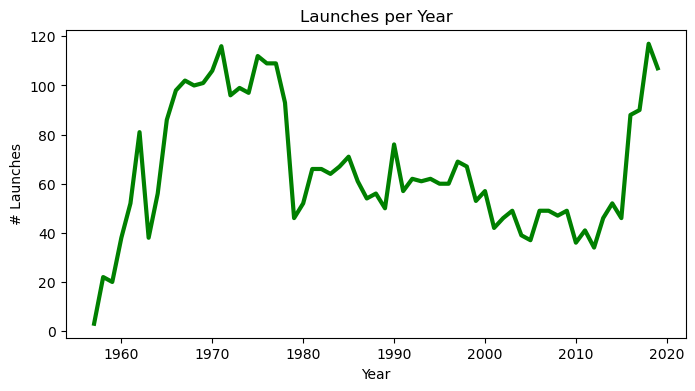

In [297]:
plt.figure(figsize = (8,4))
plt.plot(launch_by_year.date_index_year, launch_by_year.ttl_launches, color  = 'green', linewidth = 3)
plt.xlabel('Year')
plt.ylabel('# Launches')
plt.title('Launches per Year')

# Chart the Number of Launches Month-on-Month until the Present

In [298]:
df_data['date_month_start'] = df_data['date_standard'].dt.to_period('M').dt.start_time

In [299]:
launches_month = df_data.groupby(['date_month_start'], as_index=False).agg(ttl_launches = ('Detail', 'count'))

In [300]:
rolling_launches_month = launches_month.rolling(6, on = 'date_month_start').mean()

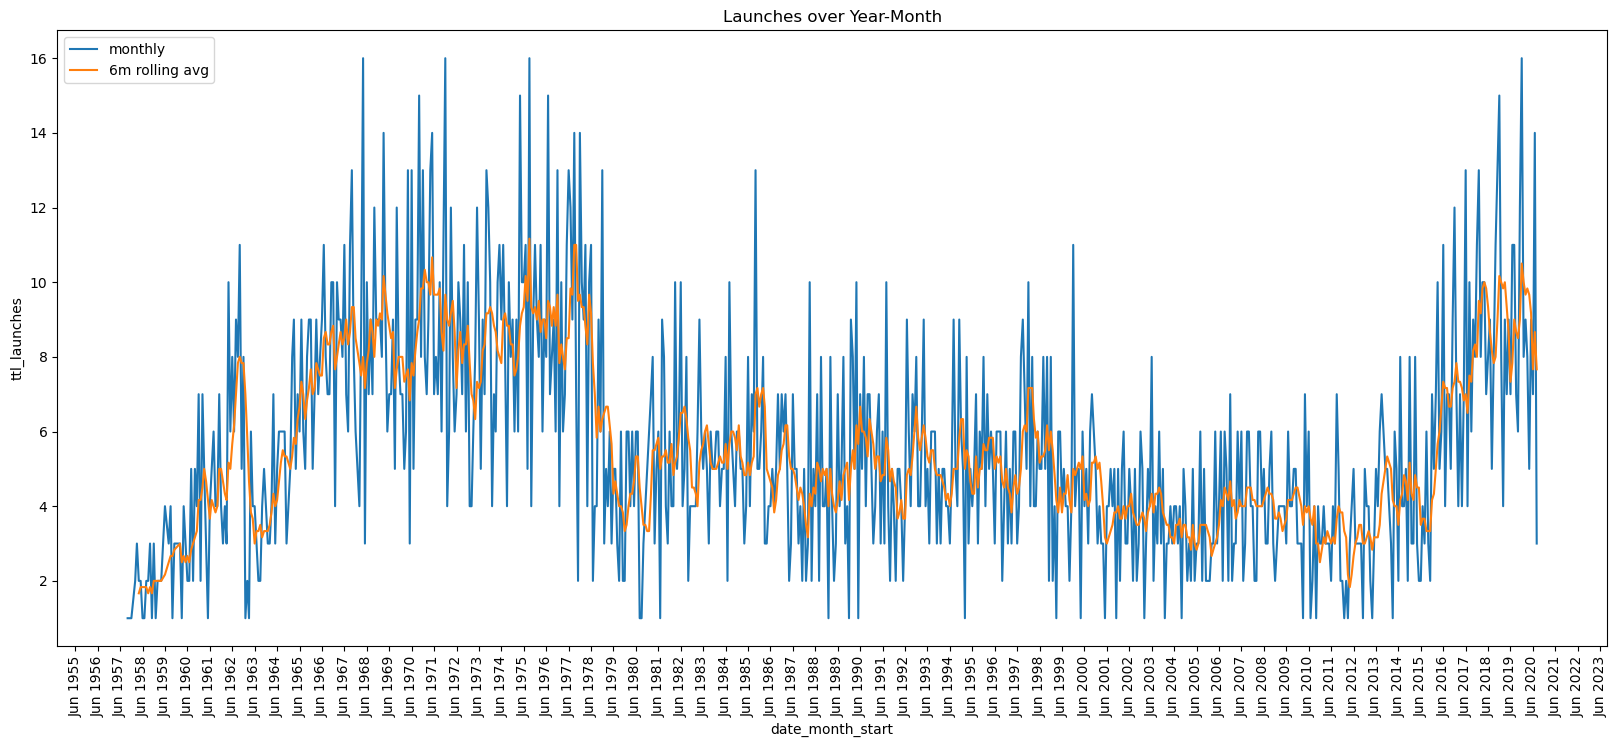

In [301]:
import matplotlib.dates as mdates
plt.figure(figsize = (20,8))
pl = sns.lineplot(data = launches_month, x="date_month_start", y="ttl_launches", label = 'monthly')
sns.lineplot(data = rolling_launches_month, x="date_month_start", y="ttl_launches", label= '6m rolling avg')
plt.legend()
pl.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
pl.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=90)
plt.title('Launches over Year-Month')
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

December seems to be the hottest season for launch missions.

In [158]:
launches_month['date_month'] = launches_month['date_month_start'].dt.month

In [159]:
launches_month['date_month_name'] = pd.to_datetime(launches_month['date_month'], format='%m').dt.month_name()

In [160]:
launches_per_month = launches_month.groupby(['date_month', 'date_month_name'], as_index=False).agg(monthly_launches = ('ttl_launches', 'mean'))

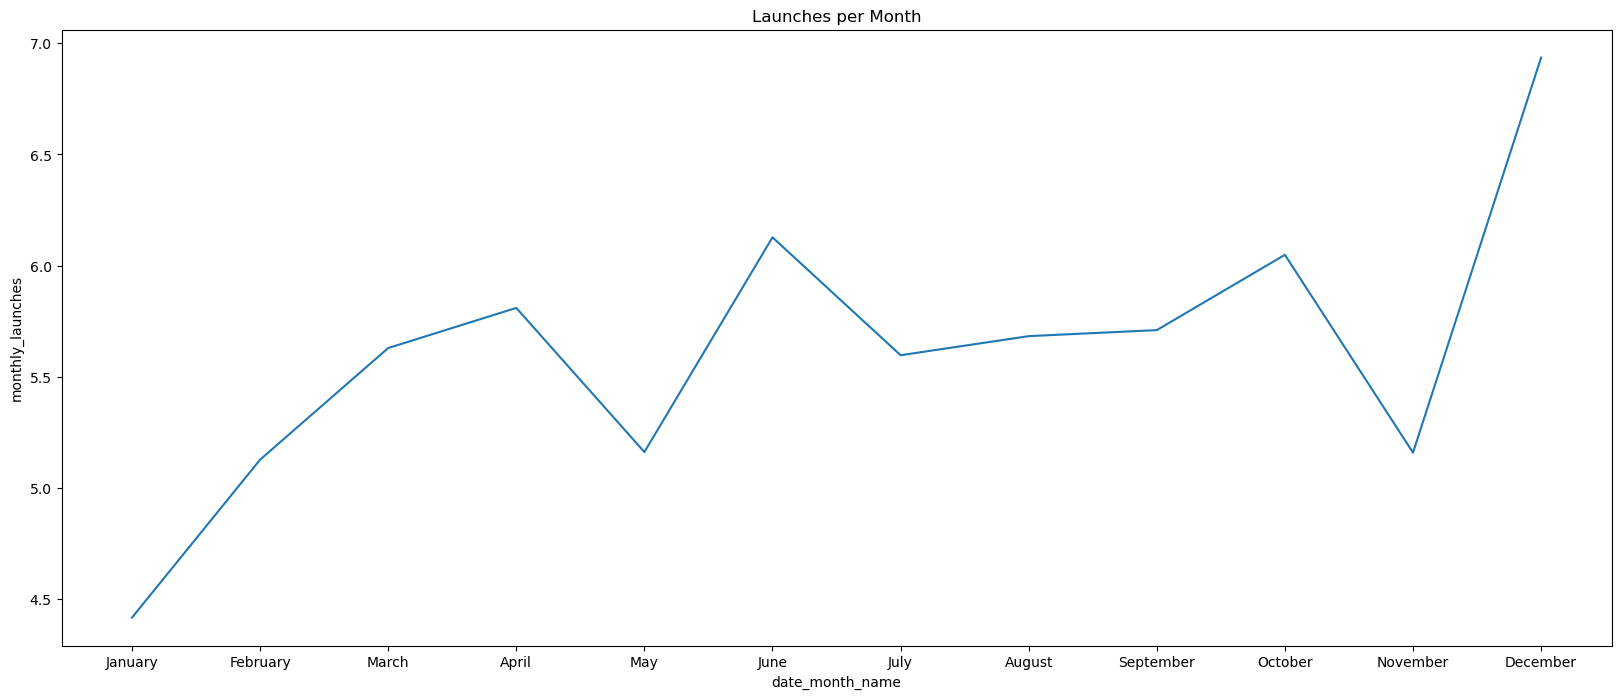

In [161]:
plt.figure(figsize = (20,8))
pl = sns.lineplot(data = launches_per_month, x="date_month_name", y="monthly_launches")
pl.set(xticks=launches_per_month.date_month_name.values)
plt.title('Launches per Month')
plt.show()

# How has the Launch Price varied Over Time? 

The cost per launch has been reducing since 1970s, except an outlier in late 1980s. It is due to 2 exceptionaly high cost missions by USSR as mentioned above.

In [152]:
df_data_dropna = df_data.dropna()
launch_money_peryear = df_data_dropna[df_data_dropna.date_index_year <2020].groupby(['date_index_year'], as_index=False).agg(ttl_money = ('Price', 'sum'),
                                                                            ttl_launches = ('Detail', 'count'))

In [153]:
launch_money_peryear['avg_price_per_launch'] = launch_money_peryear.ttl_money/launch_money_peryear.ttl_launches

Text(0.5, 1.0, 'Avg Launch Cost over Years')

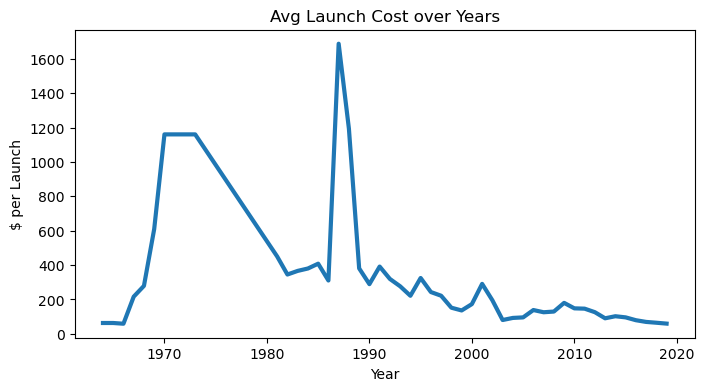

In [154]:
plt.figure(figsize = (8,4))
plt.plot(launch_money_peryear.date_index_year, launch_money_peryear.avg_price_per_launch, linewidth = 3)
plt.xlabel('Year')
plt.ylabel('$ per Launch')
plt.title('Avg Launch Cost over Years')

# Chart the Number of Launches over Time by the Top 10 Organisations. 

RVSN USSR was the absolute dominant organization for mission launches until 1990s. Since 2014, CASC has emerged to become the most dominant in the top orgs.

In [302]:
launch_by_org.sort_values('Num_launches', ascending = False, inplace = True)

In [303]:
top_10_list = launch_by_org[0:9].Organisation.values.tolist()

In [150]:
launch_by_year_org = df_data[(df_data.date_index_year <2020) & (df_data.Organisation.isin(top_10_list))].groupby(['date_index_year','Organisation'],as_index=False).agg(ttl_launches = ('Detail', 'count'))

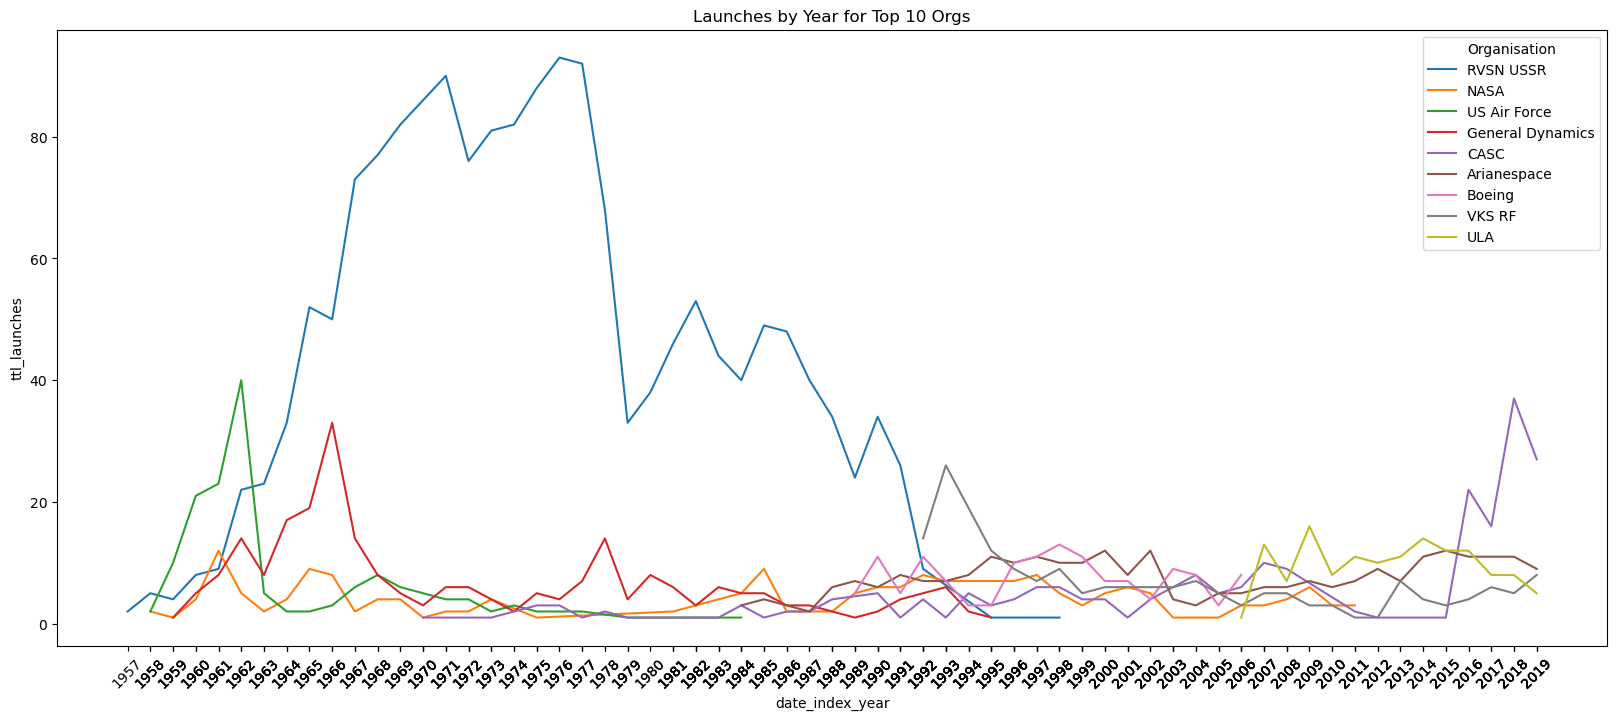

In [151]:
plt.figure(figsize = (20,8))
pl = sns.lineplot(data = launch_by_year_org, x="date_index_year", y="ttl_launches", hue='Organisation')
pl.set(xticks=launch_by_year_org.date_index_year.values)
plt.xticks(rotation=45)
plt.title('Launches by Year for Top 10 Orgs')
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. USSR exceeded USA in # launches per year since 1967 until the end of cold war.

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [133]:
df_data.Country_trans.value_counts()

Country_trans
Russian Federation                        1398
USA                                       1387
Kazakhstan                                 701
France                                     303
China                                      269
Japan                                      126
India                                       76
Iran, Islamic Republic of                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
Korea, Democratic People's Republic of       5
Korea, Republic of                           3
Brazil                                       3
Name: count, dtype: int64

In [147]:
launch_by_year_top2 = df_data[(df_data.date_index_year <=1991) & (df_data.Country_trans.isin(['Russian Federation', 'USA']))].groupby(['date_index_year','Country_trans'],as_index=False).agg(ttl_launches = ('Detail', 'count'))

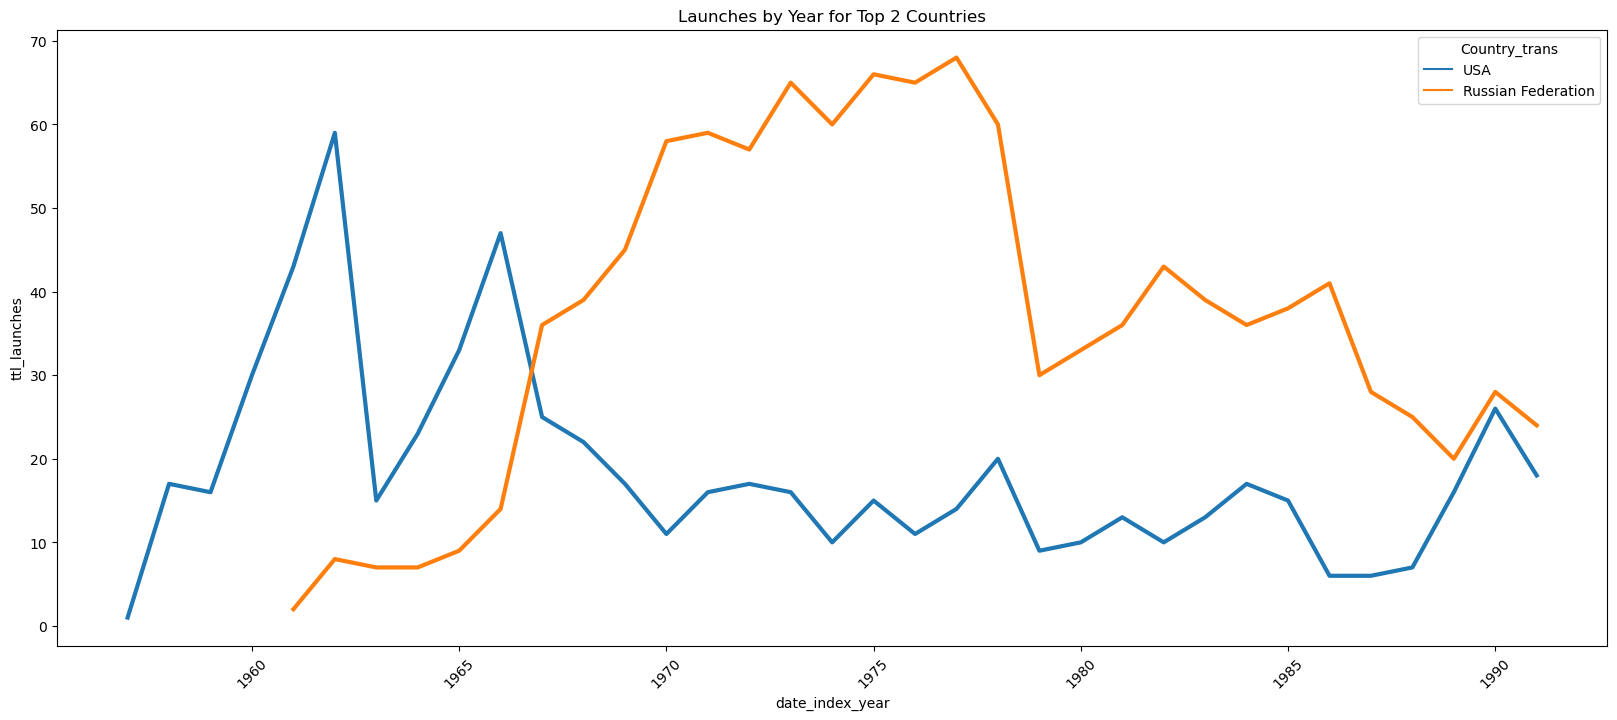

In [172]:
plt.figure(figsize = (20,8))
pl = sns.lineplot(data = launch_by_year_top2, x="date_index_year", y="ttl_launches", hue='Country_trans', linewidth = 3)
#pl.set(xticks=launch_by_year_org.date_index_year.values)
plt.xticks(rotation=45)
plt.title('Launches by Year for Top 2 Countries')
plt.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

In [169]:
launch_by_top2 = df_data[(df_data.date_index_year <=1991) & (df_data.Country_trans.isin(['Russian Federation', 'USA']))].groupby(['Country_trans'],as_index=False).agg(ttl_launches = ('Detail', 'count'))


In [171]:
fig = px.pie(launch_by_top2, values='ttl_launches', names='Country_trans', title='Launches by USA vs. USSR before 1991')
fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [174]:
failure_by_year_top2 = df_data[(df_data.date_index_year <=1991) & (df_data.Country_trans.isin(['Russian Federation', 'USA']))& (df_data.Mission_Status == 'Failure')].groupby(['date_index_year','Country_trans'],as_index=False).agg(ttl_failures = ('Detail', 'count'))


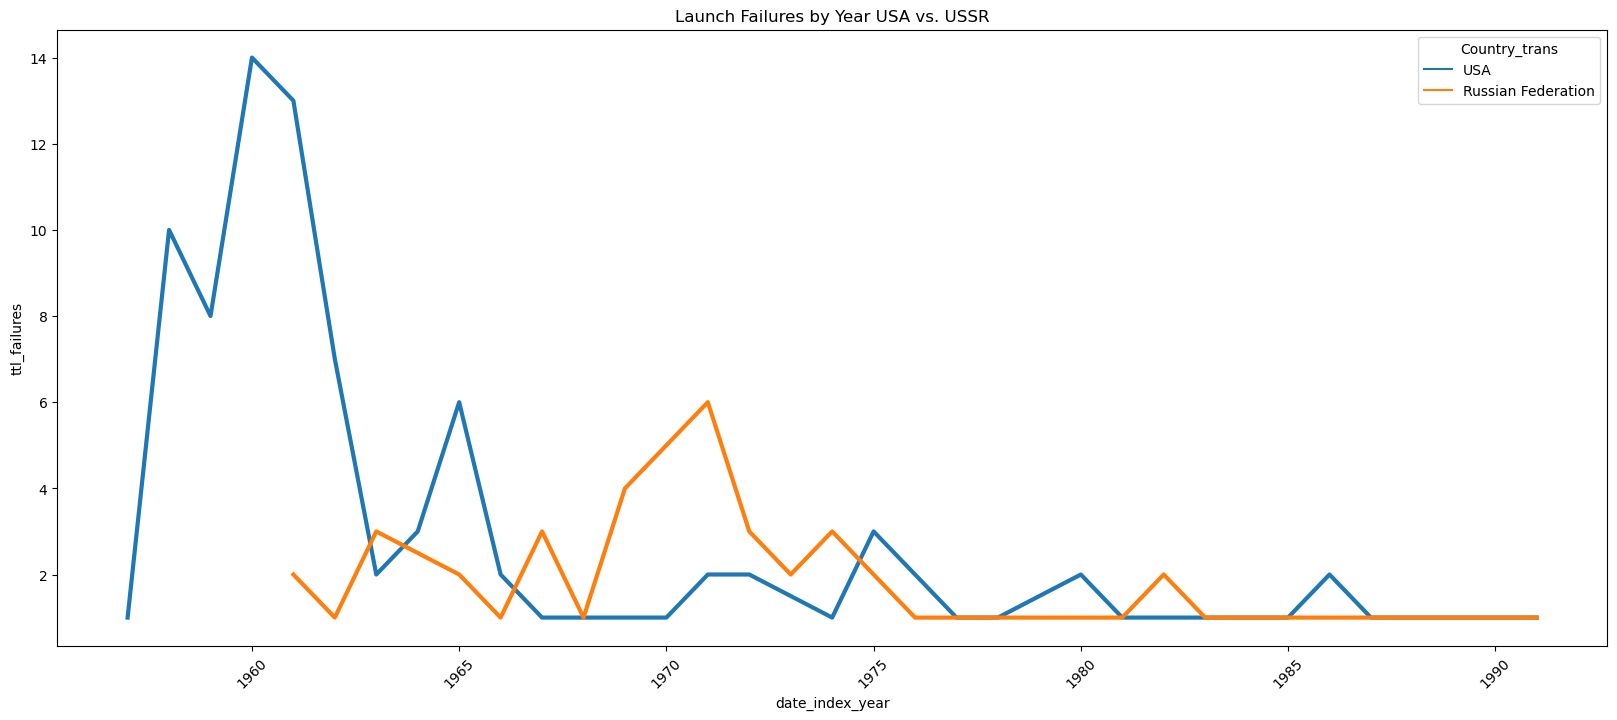

In [176]:
plt.figure(figsize = (20,8))
pl = sns.lineplot(data = failure_by_year_top2, x="date_index_year", y="ttl_failures", hue='Country_trans', linewidth = 3)
#pl.set(xticks=launch_by_year_org.date_index_year.values)
plt.xticks(rotation=45)
plt.title('Launch Failures by Year USA vs. USSR')
plt.show()

## Chart the Percentage of Failures over Time

The % of failures drastically went down to below 40% since 70s as countries gathered more experience. 

In [178]:
fail_percent_by_year_top2 = pd.merge(failure_by_year_top2, launch_by_year_top2, on = ['date_index_year', 'Country_trans'])

In [180]:
fail_percent_by_year_top2['failure_percentage'] = fail_percent_by_year_top2.ttl_failures/fail_percent_by_year_top2.ttl_launches

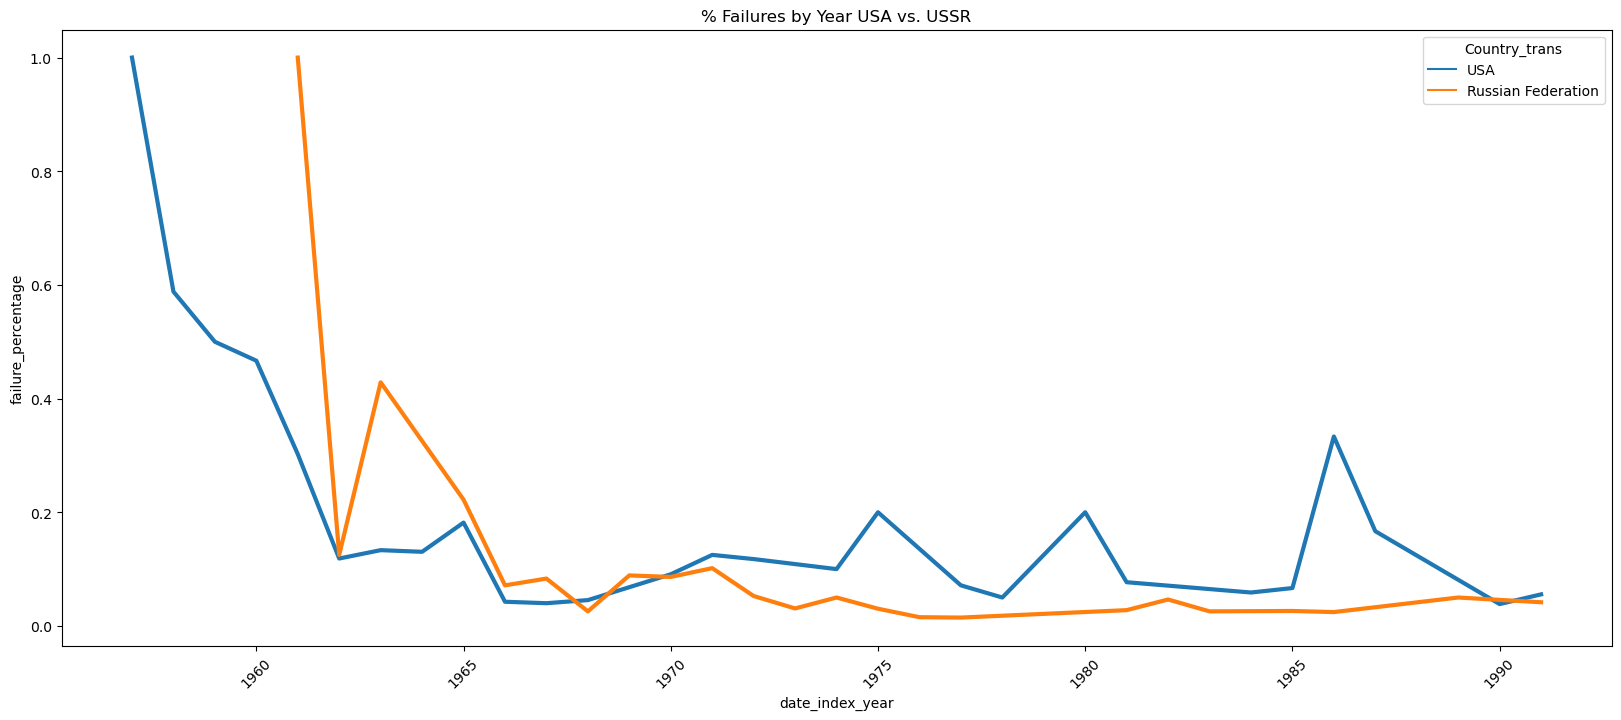

In [181]:
plt.figure(figsize = (20,8))
pl = sns.lineplot(data = fail_percent_by_year_top2, x="date_index_year", y="failure_percentage", hue='Country_trans', linewidth = 3)
plt.xticks(rotation=45)
plt.title('% Failures by Year USA vs. USSR')
plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

The leading country in launching missions has evolved from USA during 50s-60s, USSR during 70s-80s, back to USA during 90s-early 2010s to China during late 2010s-now.

In [182]:
launch_by_year_country = df_data.groupby(['date_index_year','Country_trans'],as_index=False).agg(ttl_launches = ('Detail', 'count'))


In [194]:
launch_by_year_country['rank']= launch_by_year_country.groupby(['date_index_year'])['ttl_launches'].rank(method='first', ascending=False)

In [198]:
top_launch_by_year_country = launch_by_year_country[launch_by_year_country['rank'] == 1]

In [192]:
succ_launch_by_year_country = df_data[df_data.Mission_Status == 'Success'].groupby(['date_index_year','Country_trans'],as_index=False).agg(ttl_launches = ('Detail', 'count'))
succ_launch_by_year_country['rank']= succ_launch_by_year_country.groupby(['date_index_year'])['ttl_launches'].rank(method='first', ascending=False)

In [197]:
top_succ_launch_by_year_country= succ_launch_by_year_country[succ_launch_by_year_country['rank'] == 1]

In [204]:
top_launch_by_year_country.loc[:, 'Mission_Status'] = 'All'
top_succ_launch_by_year_country.loc[:, 'Mission_Status'] = 'Success'

In [205]:
top_country_year = pd.concat([top_launch_by_year_country,top_succ_launch_by_year_country ])

In [206]:
top_country_year

,date_index_year,Country_trans,ttl_launches,rank,Mission_Status
0,"1,957.00",Kazakhstan,2,1.00,All
3,"1,958.00",USA,17,1.00,All
5,"1,959.00",USA,16,1.00,All
7,"1,960.00",USA,30,1.00,All
10,"1,961.00",USA,43,1.00,All
...,...,...,...,...,...
327,"2,016.00",USA,24,1.00,Success
334,"2,017.00",USA,29,1.00,Success
335,"2,018.00",China,38,1.00,Success
343,"2,019.00",China,32,1.00,Success


In [235]:
fig = px.bar(top_country_year, y="date_index_year", x="ttl_launches", color="Mission_Status", barmode="group", text='Country_trans', orientation='h', width=900, height=1500)
fig.update_layout(
uniformtext_minsize=12,
uniformtext_mode='show',
title="Top Country with Highest Successful and Total Launches"
)
fig.update_traces(textposition='outside')
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

RVSN USSR was the dominant orgnization in launches during 70-80s, followed by an exchange of USA organizations during 90s. Since late 2010s, CASC has become the most dominant.

In [236]:
launch_by_year_org = df_data.groupby(['date_index_year','Organisation'],as_index=False).agg(ttl_launches = ('Detail', 'count'))

In [237]:
launch_by_year_org['rank']= launch_by_year_org.groupby(['date_index_year'])['ttl_launches'].rank(method='first', ascending=False)

In [241]:
top_launch_by_year_org = launch_by_year_org[launch_by_year_org['rank'] == 1]

In [242]:
top_launch_by_year_org

,date_index_year,Organisation,ttl_launches,rank
0,"1,957.00",RVSN USSR,2,1.00
2,"1,958.00",AMBA,7,1.00
10,"1,959.00",US Air Force,10,1.00
15,"1,960.00",US Air Force,21,1.00
19,"1,961.00",US Air Force,23,1.00
...,...,...,...,...
554,"2,016.00",CASC,22,1.00
580,"2,017.00",SpaceX,18,1.00
585,"2,018.00",CASC,37,1.00
601,"2,019.00",CASC,27,1.00


In [250]:
fig = px.line(top_launch_by_year_org, x="date_index_year", y="ttl_launches", text='Organisation', width=1000, height=600)
fig.update_layout(
uniformtext_minsize=12,
uniformtext_mode='show',
title="Top Org with Highest Total Launches"
)
fig.show()